In [12]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
#loading the dataset
data_dict = {}

with open('dataset.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split(",")
        pair = {key:value}
        data_dict.update(pair)
        
data_dict = {float(key): float(value) for key, value in data_dict.items()}
data_dict


{2.81: 5.62,
 7.14: 8.0,
 2.72: 5.44,
 3.87: 7.74,
 1.9: 3.8,
 7.82: 8.0,
 7.02: 8.0,
 5.5: 8.0,
 9.15: 8.0,
 4.87: 8.0,
 8.08: 8.0,
 5.58: 8.0,
 9.13: 8.0,
 0.14: 0.28,
 2.0: 4.0,
 5.47: 8.0,
 0.8: 1.6,
 4.37: 8.0,
 5.31: 8.0,
 0.0: 0.0,
 1.78: 3.56,
 3.45: 6.9,
 6.13: 8.0,
 3.53: 7.06,
 4.61: 8.0,
 1.76: 3.52,
 6.39: 8.0,
 0.02: 0.04,
 9.69: 8.0,
 5.33: 8.0,
 6.37: 8.0,
 5.55: 8.0,
 7.8: 8.0,
 2.06: 4.12,
 7.79: 8.0,
 2.24: 4.48,
 9.71: 8.0,
 1.11: 2.22,
 8.38: 8.0,
 2.33: 4.66,
 1.83: 3.66,
 5.94: 8.0,
 9.2: 8.0,
 1.14: 2.28,
 4.15: 8.0,
 8.43: 8.0,
 5.68: 8.0,
 8.21: 8.0,
 1.75: 3.5,
 2.16: 4.32,
 4.93: 8.0,
 5.75: 8.0,
 1.26: 2.52,
 3.97: 7.94,
 4.39: 8.0,
 7.53: 8.0,
 1.98: 3.96,
 1.66: 3.32,
 2.04: 4.08,
 11.72: 8.0,
 4.64: 8.0,
 4.71: 8.0,
 3.77: 7.54,
 9.33: 8.0,
 2.15: 4.3,
 1.58: 3.16,
 9.29: 8.0,
 1.27: 2.54,
 8.49: 8.0,
 5.39: 8.0,
 3.47: 6.94,
 6.48: 8.0,
 4.11: 8.0,
 1.85: 3.7,
 8.79: 8.0,
 0.13: 0.26,
 1.44: 2.88,
 5.96: 8.0,
 3.42: 6.84,
 1.89: 3.78,
 5.26: 8.0,
 0.39:

In [14]:
# converting dictionary to pandas dataframe

df = pd.DataFrame(list(data_dict.items()), columns=["Charged time", "Battery time"])
df.head(5)

,Charged time,Battery time
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80


In [17]:
x = df[['Charged time']][:]
y = df[['Battery time']][:]

type(x)

pandas.core.frame.DataFrame

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:

threshhold  = 4

def get_predictions(input=None):
    
    if type(input) == float:
        if input < threshhold:
            preds = model.predict(input)
        else:
            preds = 8.0
        return preds
    
    else:
        preds_arr = []
        for data in input['Charged time']:
            if data < threshhold:
                prd = model.predict(input)
                preds_arr.append(prd)
            else:
                preds_arr.append(8.0)
        return pd.DataFrame(preds_arr)
        


In [46]:
y_pred = get_predictions(x_train)   # Makes predictions

y_pred[:10]

,0
0,8.0
1,8.0
2,8.0
3,"[[8.286997773792159], [9.860893632024174], [5...."
4,8.0
5,8.0
6,"[[8.286997773792159], [9.860893632024174], [5...."
7,"[[8.286997773792159], [9.860893632024174], [5...."
8,"[[8.286997773792159], [9.860893632024174], [5...."
9,8.0


ValueError: setting an array element with a sequence.

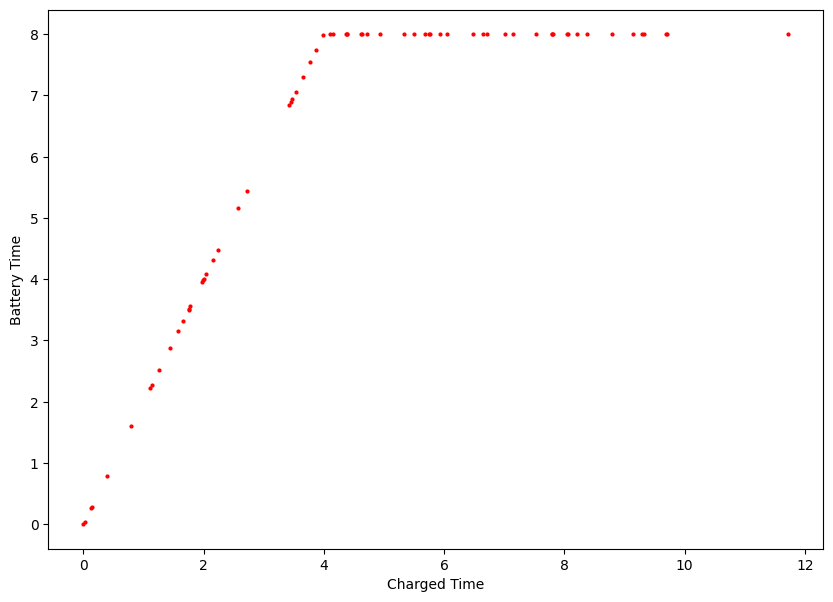

In [43]:
plt.figure(figsize=(10, 7))
plt.xlabel("Charged Time")
plt.ylabel("Battery Time")

plt.scatter(x=x_train, y=y_train, c='r', s=4, label="Training data")
plt.scatter(x=x_train, y=y_pred, c='g', s=4, label="Training data")


plt.legend(prop={"size": 14})

plt.show()

In [ ]:
import numpy as np

df_np = df.to_numpy()
df_np[:10]

array([[2.81, 5.62],
       [7.14, 8.  ],
       [2.72, 5.44],
       [3.87, 7.74],
       [1.9 , 3.8 ],
       [7.82, 8.  ],
       [7.02, 8.  ],
       [5.5 , 8.  ],
       [9.15, 8.  ],
       [4.87, 8.  ]])